# Problem Two

In [1]:
#Importing nessesary packages
import seaborn as sns
import pandas as pd
import os
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Imputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\user\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Setting the working directory
os.chdir('C:\Users\user\downloads')
#Loading the dataset with pandas
adultfn = "adult.csv"
adult = pd.read_csv(adultfn)

In [3]:
adultprocessedfn = "processedadult.txt"
adultprocessed = pd.read_csv(adultprocessedfn)

# Exploratory Data Analysis

In [4]:
#Lets see what we're working with here
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Find frequency of labels to determine if case imbalence. 
adult['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

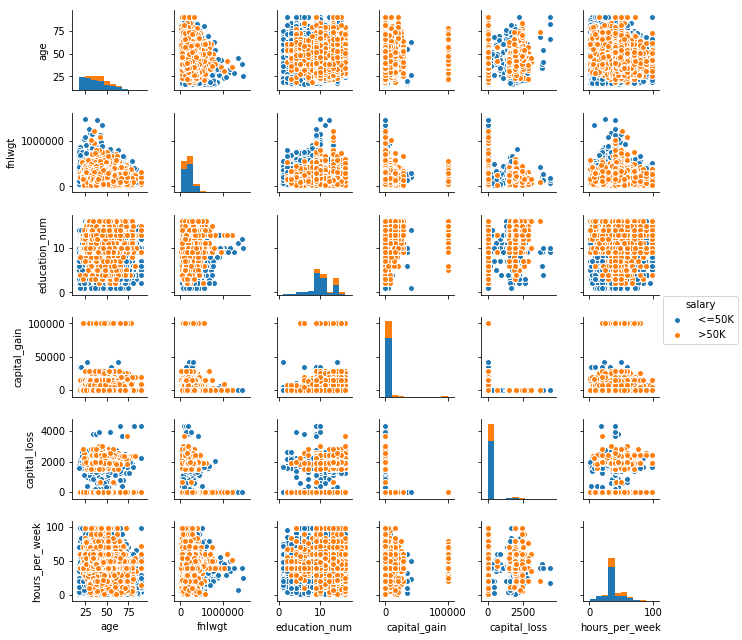

In [6]:
#Creating a few plots from the adult dataset with the seaborn package. The color of the points is determined by the label in
#our dataset ("salary").
%matplotlib inline 
sns.pairplot(adult, hue='salary', size=1.5)

This pairplot from the seaborn library is useful for potentially finding potentially interesting relationships between variables in the dataset to explore more on later.

C:\Users\user\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


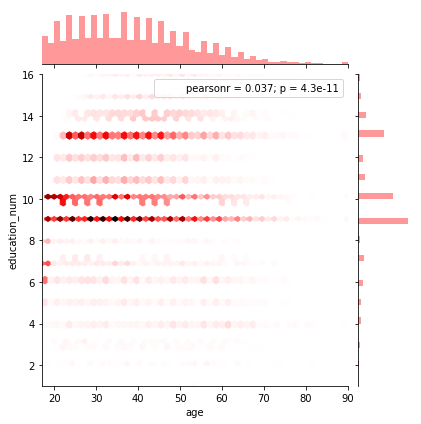

In [7]:
sns.jointplot("age", "education_num", data=adult, kind='hex', color = 'red');

The idea of this plot was to see how strong the relationship between more education was with age. Not too surprising that there is some relationship. People who are 20 haven't been alive long enough to get the same education as older people.

In [8]:
to_the_power_of = lambda n, p: n ** p

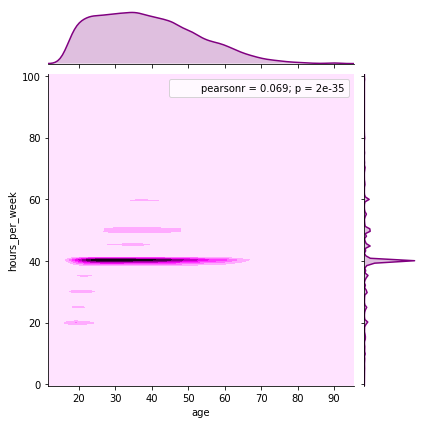

In [9]:
sns.jointplot("age", "hours_per_week", data=adult, kind='kde', color="purple");

I wanted to see if as people got older they worked less. Although this is likely true there is little evidence of it in our plot. Likeley due to retired people not being considered in the dataset. I'm glad I plotted this because I may have forgotten that there are a lot of young people working part time when they are young. 

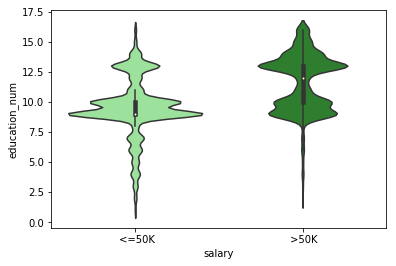

In [10]:
sns.violinplot("salary", "education_num", data=adult,
               palette=["lightgreen", "forestgreen"]);

This plot shows the makeup of those earning above 50k and below 50k compared to their education number. As you can tell from the violin plot the majority of the pass of people earning above 50k have above a high school education. What is surprising is the number of people having less than 10 years of educaiton in both of the pools

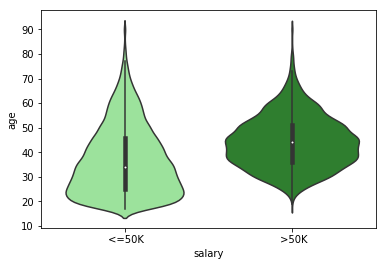

In [11]:
sns.violinplot("salary", "age", data=adult,
               palette=["lightgreen", "forestgreen"]);

In this plot you can see that people in their 30's make up a much larger proportion of those making 50k than those that are younger. Again this may seem obvious but we should confirm that as few of our preconceptions are used as possible to guide analysis. Instead we must let the data speak for itself.

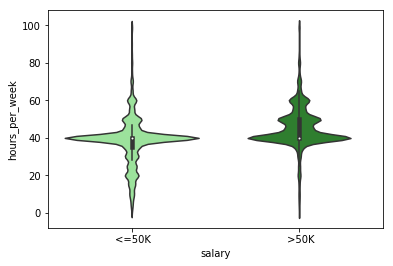

In [12]:
sns.violinplot("salary", "hours_per_week", data=adult,
               palette=["lightgreen", "forestgreen"]);

What is interesting here is that a larger percentage of those who work more than full time earn 50k and above and almost no one working less than 40 hours a week is making 50k. If I had to take a guess we could probaby take all of the observations that work less then 40 hours and be pretty confident they are making less than 50k in a year. 

# Preprocessing 

This section shows me preproccessing my dataset and encoding the label on Professor Lee's preprocessed dataset.

In [13]:
#Using pandas "get_dummies" function to encode the categorical variables as "uint8" data type. Adds a lot of columns.
adult2 = pd.get_dummies(adult, columns=["workclass", "education", "marital_status", "occupation", "relationship","race","sex","native_country",], prefix=["class", "edu","marital","occupation","relationship","race","sex","country"])
#changing predictor variable salary from "object" type to "category" type.
adult2["salary"] = adult2["salary"].astype('category')
#assigning the encoded variables to new column.
adult2["salary_cat"] = adult2["salary"].cat.codes


In [14]:
#dropping the now redundant "object" data type for analysis. This is done by only including the "uint8", "int64", and 
#"int8" types.
adult2 = adult2.select_dtypes(include=['uint8','int64','int8']).copy()

adult2.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,class_ ?,class_ Federal-gov,class_ Local-gov,class_ Never-worked,...,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,salary_cat
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#For Prof. Lee's dataset
#changing predictor variable salary from "object" type to "category" type.
adultprocessed["salary"] = adultprocessed["salary"].astype('category')
#assigning the encoded variables to new column.
adultprocessed["salary_cat"] = adultprocessed["salary"].cat.codes



In [16]:
#dropping the now redundant "object" data type for analysis. This is done by only including the "uint8", "int64", and 
#"int8" types.
adultprocessed = adultprocessed.select_dtypes(include=['uint8','int64','int8']).copy()
# End for Prof. Lee's dataset

# Partitioning the data set

In this section I split the encoded data into a test/train split for analysis. 

In [17]:
##Uses self encoding
Y_adult2 =adult2['salary_cat']

In [18]:
X_adult2 = adult2.drop('salary_cat', axis=1)

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_adult2, Y_adult2,
                                                random_state=9)
Xcolnames = list(X_adult2)

# Naive Bayes

In this section and the following ones I am simply using my test train split to build multiple models and then subsequently testing their accuracy and area under the roc curve.

In [20]:
                                           # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [21]:
#Get accuracy score from model used above
accuracy_score(ytest, y_model)

0.8000245670065103

In [22]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6283092018019842

# Logistic Regression

In [23]:
logreg = LogisticRegression().fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg.score(Xtest, ytest)))

Training set score: 0.796
Test set score: 0.803


In [24]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6159107883352537

In [25]:
logreg100 = LogisticRegression(C=100).fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg100.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg100.score(Xtest, ytest)))

Training set score: 0.796
Test set score: 0.802


In [26]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6159107883352537

In [27]:
logreg001 = LogisticRegression(C=0.01).fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg001.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg001.score(Xtest, ytest)))

Training set score: 0.796
Test set score: 0.802


In [28]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6159107883352537

# K Nearest Neighbors

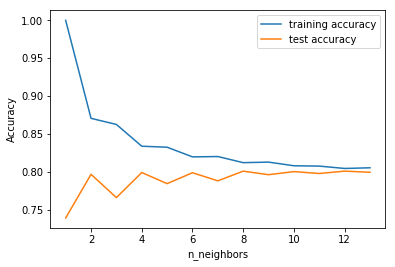

In [29]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 14
neighbors_settings = range(1, 14)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(Xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(clf.score(Xtrain, ytrain))
    # record generalization accuracy
    test_accuracy.append(clf.score(Xtest, ytest))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

After looking at the graph comparing performance from k = 1 to 14 nearest neighbors it looks like 2, 4, 6 and 8 might be optimal. Let's try each of them out and go on from there.

In [30]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.80


In [31]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.621375447585586

In [32]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.80


In [33]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6165077516356365

In [34]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.80


In [35]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6077657541786589

In [36]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.80


In [37]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6038332852887318

Looks like a three way tie if we were just comparing the accuracy scores. Thisd demonstrates why the roc curve is a much more usefull metric. If I had just been looking at the accuracy scores I might come to the wrong conclusion that these three models are the same. It appears that k=6 has a slight advantage over the k=8 and k=4. 

# Decision Tree

In [38]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.816


In [39]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7450539613040748

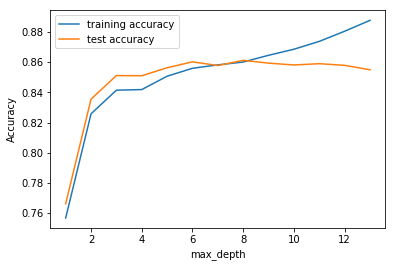

In [40]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 14
max_depth_settings = range(1, 14)

for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(Xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(clf.score(Xtrain, ytrain))
    # record generalization accuracy
    test_accuracy.append(clf.score(Xtest, ytest))
    
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Looks like max_depth at 6 and 8 looks optimal. Lets try each to see which one does better.

In [41]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 0.856
Accuracy on test set: 0.860


In [42]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7482890112757956

In [43]:
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 0.860
Accuracy on test set: 0.861


In [44]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7522168469925735

# Random Forest

In [45]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(Xtrain, ytrain)
y_model = forest.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(forest.score(Xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.856


In [46]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7725290992757592

In [47]:
forest = RandomForestClassifier(n_estimators=6, random_state=0)
forest.fit(Xtrain, ytrain)
y_model = forest.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(forest.score(Xtest, ytest)))

Accuracy on training set: 0.976
Accuracy on test set: 0.842


In [48]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7385950230959469

# Gradient Boosting Classifier

In [49]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.868
Accuracy on test set: 0.871


In [50]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7787362455831118

In [51]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.852
Accuracy on test set: 0.859


In [52]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7460846317309686

In [53]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.843
Accuracy on test set: 0.851


In [54]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7156996083031181

# Support Vector Machine

In [55]:
#DONT RUN (Unless you want to wait a really really really really long time)
#svc = SVC(C=1000)
#svc.fit(Xtrain, ytrain)
#
#print("Accuracy on training set: {:.2f}".format(svc.score(Xtrain, ytrain)))
#print("Accuracy on test set: {:.2f}".format(svc.score(Xtest, ytest)))

# Neural Nets

In [56]:
mlp = MLPClassifier(random_state=42)
mlp.fit(Xtrain, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.2f}".format(mlp.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(mlp.score(Xtest, ytest)))

Accuracy on training set: 0.61
Accuracy on test set: 0.61


In [57]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.713152879382329

In [58]:
# compute the mean value per feature on the training set
mean_on_train = Xtrain.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = Xtrain.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (Xtrain - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (Xtest - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.895
Accuracy on test set: 0.850


In [59]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5198081630445642

In [60]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.895
Accuracy on test set: 0.850


In [61]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5198081630445642

In [62]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.860
Accuracy on test set: 0.860


In [63]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5858327758081644

   Overall it looks like the Gradient Boosting Classifier comes out as the best model for this particular dataset at around 77% under the ROC curve. The next best model is the Random Forest Classifer coming in just slightly below the Gradient Boosting Classifier at 77% under the ROC curve. A decision tree with maximum depth = 8 was the one of the fastest models to run and had comperable performance to the best two at 75% under the ROC curve. The main comparison should likely be made between the Gradient Boosting Classifier for maximum performance and the Decision tree with max depth = 8 for "good enough" and fast. 

   The main critique of this analysis that I would have changed if given more time would be to most likely do more research into sampling methods for a a case unbalanced dataset like this one. Additionally I would have liked to use more advanced imputation techniques to possibly squeak out a little more accuracy. Overall though I would say that this analysis has high enough predictive accuracy to possibly add some value to consumers. The possible context for analysis like this would be for a financial services firm who may want to market specific services to those making above this specific threshold without directly asking their customers how much they make. 

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

# Analysis with Prof. Lee's imputed and encoded dataset

In [64]:
#Uses preproccessed data from Prof. Lee
Y_adult2 =adultprocessed['salary_cat']

In [65]:
X_adult2 = adultprocessed.drop('salary_cat', axis=1)

In [66]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_adult2, Y_adult2,
                                                random_state=9)
Xcolnames = list(X_adult2)

# Naive Bayes

In [67]:
                                           # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [68]:
#Get accuracy score from model used above
accuracy_score(ytest, y_model)

0.799901731973959

In [69]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.628229047906505

# Logistic Regression

In [70]:
logreg = LogisticRegression().fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg.score(Xtest, ytest)))

Training set score: 0.796
Test set score: 0.802


In [71]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6147796622905364

In [72]:
logreg100 = LogisticRegression(C=100).fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg100.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg100.score(Xtest, ytest)))

Training set score: 0.796
Test set score: 0.803


In [73]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6147796622905364

In [74]:
logreg001 = LogisticRegression(C=0.01).fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg001.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg001.score(Xtest, ytest)))

Training set score: 0.796
Test set score: 0.802


In [75]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6147796622905364

# K Nearest Neighbors

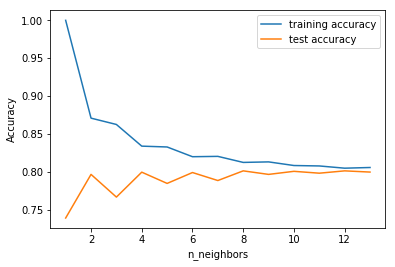

In [76]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 14
neighbors_settings = range(1, 14)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(Xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(clf.score(Xtrain, ytrain))
    # record generalization accuracy
    test_accuracy.append(clf.score(Xtest, ytest))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

After looking at the graph comparing performance from k = 1 to 14 nearest neighbors it looks like 2, 4, 6 and 8 might be optimal. Let's try each of them out and go on from there.

In [77]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.80


In [78]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6206896537200084

In [79]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.80


In [80]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6165879055311159

In [81]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.80


In [82]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6076856002831796

In [83]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.80


In [84]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6038332852887318

# Decision Tree

In [85]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.811


In [86]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7418923681866451

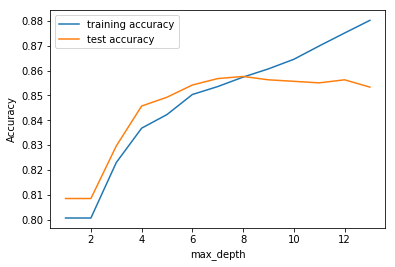

In [87]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 14
max_depth_settings = range(1, 14)

for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(Xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(clf.score(Xtrain, ytrain))
    # record generalization accuracy
    test_accuracy.append(clf.score(Xtest, ytest))
    
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Looks like max_depth at 6 and 8 looks optimal. Lets try each to see which one does better.

In [88]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 0.850
Accuracy on test set: 0.854


In [89]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7484007128684446

In [90]:
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 0.857
Accuracy on test set: 0.858


In [91]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7509077649791751

# Random Forest

In [92]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(Xtrain, ytrain)
y_model = forest.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(forest.score(Xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.855


In [93]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7723109189401929

In [94]:
forest = RandomForestClassifier(n_estimators=6, random_state=0)
forest.fit(Xtrain, ytrain)
y_model = forest.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(forest.score(Xtest, ytest)))

Accuracy on training set: 0.976
Accuracy on test set: 0.846


In [95]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7465797494615832

# Gradient Boosting Classifier

In [96]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.865
Accuracy on test set: 0.867


In [97]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7672823255227019

In [98]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.846
Accuracy on test set: 0.855


In [99]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7185718386975088

In [100]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.812
Accuracy on test set: 0.819


In [101]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6139726056477202

# Support Vector Machine

In [102]:
#DONT RUN (Unless you want to wait a really really really really long time)
#svc = SVC(C=1000)
#svc.fit(Xtrain, ytrain)
#
#print("Accuracy on training set: {:.2f}".format(svc.score(Xtrain, ytrain)))
#print("Accuracy on test set: {:.2f}".format(svc.score(Xtest, ytest)))

# Neural Nets

In [103]:
mlp = MLPClassifier(random_state=42)
mlp.fit(Xtrain, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.2f}".format(mlp.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(mlp.score(Xtest, ytest)))

Accuracy on training set: 0.79
Accuracy on test set: 0.80


In [104]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.593911260750436

In [105]:
# compute the mean value per feature on the training set
mean_on_train = Xtrain.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = Xtrain.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (Xtrain - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (Xtest - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.893
Accuracy on test set: 0.847


In [106]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5300997042013783

In [107]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.893
Accuracy on test set: 0.847


In [108]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.5300997042013783

In [109]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.860
Accuracy on test set: 0.856


In [110]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.558836792179608